# *Lecture 23*

# Physical Waves in 1 Dimension

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

# Introduction

We have investigated partial differential equations of several types over the past few lectures, with focus on elliptic (Laplace) and parabolic (heat) equations.
Now we turn to the last of the three types: the hyperbolic wave equation

We know the wave equation of the form

$$\frac{\partial^2 f}{\partial t^2} - C^2 \frac{\partial^2 f}{\partial x^2} = 0$$

(Note that, in this form, $C^2$ is just a constant; we have not related it to the wave velocity yet.)

Today we will focus on an example of physical wave in 1 dimension, with the model of a string stretched between two endpoints.
You may worked with the *time-independent* equation governing the shape of the string between endpoints, but now we will treat the *time-dependent* case.

The simplest form of this equation can be solved analytically, but almost any modification will require a numerical solution.
The solution will involve time stepping, in the same way as for the solution of the heat equation.

# Linear Wave Equation

## Physical Application: Light String

For this derivation, we assume a light string with linear mass density $\mu$ and under tension $T$.
The motion in $y$ (transverse to the string) is caused by the force $F_y = m a_y$.

<img src="Figures/Figure_21.1.png" width="75%">

$$\sum F_y = \mu \Delta x \frac{\partial^2 y}{\partial t^2}$$

But the force in $y$ is purely due to the tension component $T_y$.

$$T_y = T\sin\theta(x+\Delta x) - T\sin\theta(x)$$

If $\theta$ is small enough so that $\sin\theta \simeq \tan\theta =\partial y/\partial x$, then 

$$T_y = T \left. \frac{\partial y}{\partial x}\right|_{x+\Delta x} 
- T \left.\frac{\partial y}{\partial x}\right|_x \simeq T \frac{\partial^2
y}{\partial x^2} \Delta x$$

This is a specific assumption to render the equation linear; otherwise we would need to relate $T_y$ to the change in $y$ through a different equation.

With this assumption, we have

$$\frac{\partial^2 y(x,t)}{\partial x^2} = \frac{\mu}{T} \frac{\partial^2 y(x,t)}{\partial t^2}$$

This is the familiar wave equation with wave velocity $v = \sqrt{T/\mu}$.

## Analytic Solution

Of course there is no unique solution to the wave equation for the string, unless we provide a sufficient number of boundary conditions.

The second-order differential equation requires initial conditions at every point in space not only for the position $y$, but also for the velocity $\partial y/\partial t$.
When we find the numerical solution, we will have to put the velocity condition in by hand, as the difference between $y$ positions at early times.

In the past, you have solved for the motion of the linear string by separating the general solution into two pieces, one for changes with position and one for changes with time.

$$y(x,t) = X(x)T(t)$$

These two solutions $X$ and $T$ must satisfy two separate **ordinary** differential equations:

$$\frac{d^2 T(t)}{dt^2} +\omega^2 T(t) = 0, \quad \frac{d^2
X(x)}{dx^2} +k^2 X(x) = 0,\quad v { = } \frac{\omega}{k}$$

and each of these equations has its own boundary conditions that must be satisfied.
Now $v$ really does mean something physical.  It is the **phase velocity** of the wave in $x$ (which is not the same as the velocity in $y$ of the individual elements along the string).

### Spatial Solution

There are infinitely many solutions, indexed by $n$.  Each mode $n$ has a different wavenumber $k_n$.
The spatial solution $X(x)$ has the general solution

$$X_n(x) = A_n \sin {k_n x} + B_n \cos {k_n x}, \quad k_n = \frac {\pi (n+1) } {L}, \quad n = 0, 1, \ldots$$

If the **initial condition** is that the string is fixed at the ends ($x=0,L$), then we must have $B_n =0$ for all of the coefficients.

### Time Solution

We can write down the time solution $T(t)$ right away.  There are again infinitely many solutions, indexed by $n$.  Each mode $n$ has a different frequency $\omega_n$:

$$T_n(t) = C_n \sin \omega_n t + D_n \cos \omega_n t, \quad
\omega_n = n  v k_0 = n \frac{2\pi v}{L}$$

If the **initial condition** is that the string is released from rest ($\partial y/\partial t$), then the coefficients $C_n$ must all be 0.
Then the $D_n$ can be scaled away through normalization.

### Combined Solution

After combining the spatial solution and the time solution, with those initial conditions, we have 

$$y(x,t) = X(x) T(t) = \sum_{n=0}^\infty \sin k_nx \cos \omega_n t, \quad n=0, 1,
\ldots$$

## Numerical Solution

### Finite Difference Equation

As we have done with other PDEs, we now use the central-difference approximations (aka "midpoint algorithm" for the second derivatives) to convert the differential wave equation into a finite difference equation.  This will allow us to use a **discrete grid** of $x$ and $t$ values to solve the equations.

$$\frac{\partial^2 y }{\partial t^2} \simeq
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}}{(\Delta t)^2}, \quad
\frac{\partial^2 y}{\partial x^2} \simeq \frac{y_{i+1,j}
+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}$$

These can be substituted into the differential equation to obtain the finite difference equation:

$$
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}} {v^2 (\Delta t)^2}  =
\frac{y_{i+1,j}+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}$$

Notice that this equation contains three time values: 
* $j+1 = $ "the future," 
* $j  = $ "the present," and 
* $j - 1 = $ "the past." 

As always, we try to
rearrange the difference equation into an *explicit* form that permits us to predict the future solution
from the present and past solutions:

$$
y_{i,j+1}  = 2 y_{i,j}-y_{i,j-1}+ \frac{v^2 }
{C'^{2}} \left [ y_{i+1,j}+y_{i-1,j}-2 y_{i,j}\right], \quad C'
\equiv \frac {\Delta x}{\Delta t}$$

Here $C'$ is a combination of numerical parameters with the dimension of
velocity whose size relative to $v$ determines the stability of the
algorithm. (You might guess that we should have $v/C' < 1$ for stability. That is correct.)


The algorithm propagates the wave from two
earlier times, $j$ and $j-1$, and from three nearby positions, $i-1$,
$i$, and $i+1$, to a later time $j+1$ and a single space position $i$.

<img src="Figures/Figure_21.2.png" width=30%>

Note the differences between the explicit updating schemes for this wave equation, for Laplace's equation, and for the heat (diffusion) equation.

### Time-Stepping toward Solution

Since we do not have boundary conditions in the time domain (we don't know the final outcome), but we do know initial conditions (position and velocity for each part of the string), we will use a time-stepping method instead of a relaxation method.

The main difference with respect to the heat equation is that we are pulling in terms from time step $j-1$ and not just $j$.  (There are four terms in total, instead of three.)

There is one **numerical boundary condition** to consider.
It does not help to know the initial position and velocity for the points, if we are not using the velocity in our numerical solution.
The trick is to incorporate the initial velocity condition (like $v(0)=0$) into the first few values of the position at time step $j$.
Since the velocity is a time derivative, we can write it in terms of a central-difference equation, and set it to 0 for the initial condition:

$$\frac{\partial y}{\partial t}(x,0) \simeq \frac{y(x, \Delta t)- y(x,
-\Delta t)}{2\Delta t}=0, \ \Rightarrow \ y_{i, 0} = y_{i,2}$$

This equation is true for all values of $x$; the string is at rest everywhere at $t=0$.

To use the equation, we have to assume that $t=0$ corresponds to step $j=1$, so that we have $j=0$ already in hand for the calculation.
(You could carry this idea further to say that $j=0$ corresponds to $t=-\Delta t$, but that's not physical for this case.)

$$\frac{y_{i,2} - y_{i,0}}{2\Delta t} = 0$$

We use this to substitute for $y_{i,j-1}$ in the first time step $(j=1)$:

$$\begin{align}
y_{i,2} &= 2 y_{i,1}-y_{i,0}+ \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right] \\
&= 2 y_{i,1}-y_{i,2} + \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
2y_{i,2} &= 2 y_{i,1} + \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
y_{i,2} &= y_{i,1} + \frac{v^2 }{2 C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
\end{align}$$

### Example: plucked string

We set one initial condition for each point (velocity $dy/dt=0$).
The second initial condition for each point is given by the initial position of each piece of string.
The "pluck" in this case brings one point in the string (at $0.8L$) to 0.1 m from the equilibrium position.
That pluck causes the string to assume an initial position $(y\neq 0)$ everywhere, except the ends.

We keep only the latest three time steps in the `xi` array, since we are plotting the animation in real time.

Can you tell if the code is using the Jacobi method, or the Gauss-Seidel method?

<IPython.core.display.Javascript object>


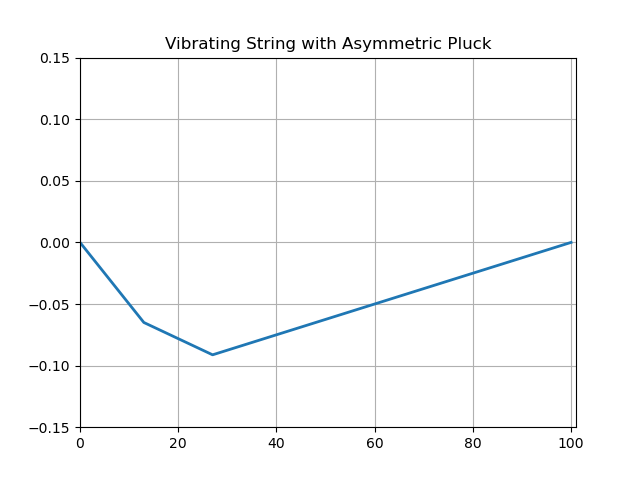

In [1]:
#### EqStringAnimate.py, Notebook Version, Vibrating string + MatPlotLib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
N = 101
mu = 0.01                                                # string density
ten = 40.                                                  # string tension
c = np.sqrt(ten/mu)                                       # Propagation speed
c1 = c                                                      # CFL criterion
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (N, 3), float)                            # 101 x's & 3 t's 
k=range(0,N)
def init():
    for i in range(0, 81):
        xi[i, 0] = 0.00125*i          # Initial condition: string plucked,shape
    for i in range (81, 101):                           # first part of string
        xi[i, 0] = 0.1 - 0.005*(i - 80)                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 101), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             

This string is fixed on the ends, so the pulse reflection is inverted relative to the incident pulse.

### Exploration

Try setting different initial conditions for the string (different plucking), and check that the behavior matches your expectations.
* Center pulse splits into two pulses
* Fundamental frequency ($n=1$)

What happens as you increase the number of steps in $x$ (thereby reducing $h_x$)?

<IPython.core.display.Javascript object>


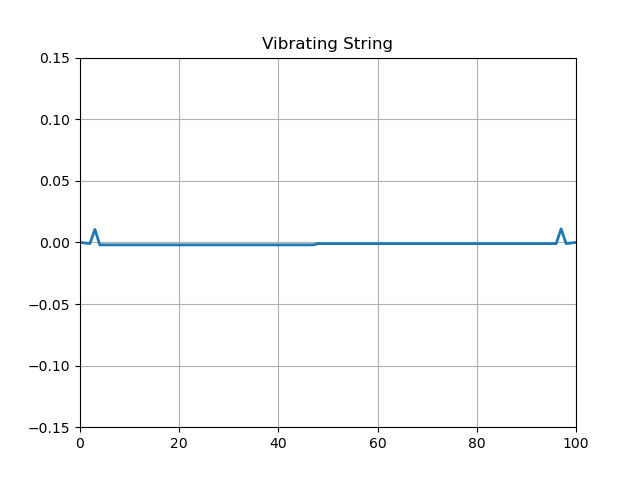

In [2]:
#### EqStringAnimate.py, Notebook Version, Vibrating string + MatPlotLib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
N = 101
mu = 0.01                                                # string density
ten = 40.                                                  # string tension
c = np.sqrt(ten/mu)                                       # Propagation speed
c1 = c                                                      # CFL criterion
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (N, 3), float)                            # 101 x's & 3 t's 
k=range(0,N)
def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.0005*i
    for i in range(int(N/2)+1,N):
        xi[i,0] = xi[int(N/2)-1,0] -0.0005 * (i-(int(N/2)-1))

  #  for i in range(0,N):
  #       xi[i,0] = 0.1 * np.sin(10*np.pi*i/(N-1))    
    
init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N-1), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,N-1):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1,interval=100)           
plt.show()             

## Stability and the Courant Condition

We skipped over the details of the von Neumann stability analysis for the heat equation (but please read them in Chapter 20.2.3).
Here we dive into the details of the stability for the wave equation (not in the text).
Even more details are given in [Trefethen's book](https://people.maths.ox.ac.uk/trefethen/4all.pdf).

The question is how the accuracy of the numerical solution changes when the position step $h_x$ changes.
Does it depend on the time step $h_t$, too?

In general, **you cannot pick arbitrary $h_x$ and $h_t$ and expect stable, accurate solutions**.

Let us start with a *simple case of first-order PDE*:

$$\frac{\partial u}{\partial t} = C \frac{\partial u}{\partial x}$$

A simple *central-difference* substitution gives the following equation:

$$u(x,t + h_t) = u(x,t) + C\frac{h_t}{h_x} \left[ u(x+h_x, t) - u(x,t) \right]$$

For convenience, we define $u(x,0) \equiv u_0(x)$, the initial condition.
It should be evident from our analytic solution that $u_0(x)$ can be written as a Fourier series.
All of the Fourier modes will evolve with time -- each is its own solution to the wave equation.
What is required so that our numerical solution captures all of them accurately?

Initially ($t=0$), we have the simple spatial function
$$u_0(x) = e^{ikx}$$

And after some time $t$, the system has evolved according to the finite difference equation:

$$\begin{align}
u(x, h_t) &= e^{ikx} + C\frac{h_t}{h_x} \left[ e^{ik(x+h_x)} - e^{ikx} \right] \\
&= \left[ 1 + C\frac{h_t}{h_x}\left( e^{ikh_x} - 1 \right) \right] e^{ikx} \\
&= G(k) e^{ikx} \\
&= G(k) u_0(x) \\
\end{align}$$

Here, $G(k)$ is a *growth factor* or *amplification factor* that multiplies the previous result at each time step.
After $n$ time steps, the growth becomes $G^n(k)$.
Obviously the solution becomes unstable and blows up if $|G|>1$.
We need to keep $|G|\leq1$ for a stable solution.

The largest $|G|$ occurs when $kh_x = \pi$.  In that case,

$$\begin{align}
|G| & \leq 1 \\
\left| 1-2 C \frac{h_t}{h_x} \right| & \leq 1 \\
-1 + 2C \frac{h_t}{h_x} & \leq 1 \\
C\frac{h_t}{h_x} & \leq 1
\end{align}$$

In our text, this is written as

$$c \leq c' = \frac{\Delta x}{\Delta t}$$

The stability condition also tells us that the solution should get better with smaller *time* steps $h_t$
but gets worse for smaller *space* steps $h_x$ (unless you simultaneously make the time
step smaller). Having different sensitivities to the time and space steps may
appear surprising because the wave equation is symmetric in $x$ and
$t$, yet the symmetry is broken by the nonsymmetric initial and boundary
conditions.
We start with known initial position conditions and with boundary conditions fixed for all time.

Here are some examples of mesh grids $\lambda = C h_t/h_x$ that are good and bad.

<img src="Figures/Trefethen_1.png" width="60%">
<img src="Figures/Trefethen_2.png" width="60%">

Amazingly, the same condition holds when the stability analysis is applied to the second-order PDE.

$$\lambda \equiv \left| C \frac{h_t}{h_x} \right| \leq 1$$

One way to think about this is to rewrite the second-order differential equation in linear algebra form:

$$\frac{\partial}{\partial t} 
\begin{bmatrix}
\frac{\partial u}{\partial t} \\
C \frac{\partial u}{\partial x}
\end{bmatrix}
=
\begin{bmatrix}
0 & c \\
c & 0
\end{bmatrix}
\frac{\partial}{\partial x} 
\begin{bmatrix}
\frac{\partial u}{\partial t} \\
C \frac{\partial u}{\partial x}
\end{bmatrix}
$$

We can treat this as a vector version of the first-order equation, and all of the same conditions related to growth will apply.

*Exercise*: how could you check the motion of a string vibrating in its fundamental mode?